## For doing basic machine learning, we can use sklearn, a python package that allows for classification and regression models. Sklearn also has cool tools for data preprocecssing, model analysis, and other userful ML tasks 

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from matminer.datasets import load_dataset
from pymatgen.core import Composition
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matminer'

## Let's train a Random Forrest model to predict bandgap based on a given composition

In [6]:
bandgap_data = load_dataset('double_perovskites_gap') #Load our dataset
bandgap_data = bandgap_data.drop(labels=['a_1', 'b_1', 'a_2', 'b_2'], axis=1) #Get rid of columns we don't need

NameError: name 'load_dataset' is not defined

In [7]:
display(bandgap_data) #So we can see how our dataframe is set up

NameError: name 'bandgap_data' is not defined

### Next we determine the number and types of elements in our dataset 

In [4]:
ele_lst = []
for comp in bandgap_data['formula']:
    element_lst = [ele.symbol for ele in Composition(comp).elements] #Use pymatgen Composition class to turn the formula strings into elements
    for element in element_lst:
        if element not in ele_lst:
            ele_lst.append(element)
print(ele_lst)
print(f" there are {len(ele_lst)} elements in the dataset")

NameError: name 'bandgap_data' is not defined

### Then we can define a function to turn each formula into a numerical representation we can train on. 
### For each formula in our dataset, we'll construct a vector of 0s that is ele_lst in length, where each position represents a given element. We'll then replace each element in a given formula with its stoichiometric representation

In [2]:
def formula_to_vector(formula, ele_lst):
    '''
    convert the formula into a vector
    formula: the formula of the composition,
    ele_lst: the element list, we want to use to generate the vector
    '''
    # Initialize vector of zeros
    vector = np.zeros(len(ele_lst), dtype=int)

    # Parse the formula to extract elements and their counts
    ele_dicts = Composition(formula).as_dict()
    for elem, count in ele_dicts.items():
        if elem in ele_lst:
            index = ele_lst.index(elem)
            vector[index] = int(count) if count else 1 #replace respective eles in vector with their stoichiometric composition

    return vector

### Let's test our function to make sure it works:

In [3]:
formula1 = 'AgNbLaAlO6'
formula2 = 'AgNbLaGaO6'

vector1 = formula_to_vector(formula1, ele_lst)
vector2 = formula_to_vector(formula2, ele_lst)

print(f"{formula1} = {vector1}")
print(f"{formula2} = {vector2}")

NameError: name 'ele_lst' is not defined

## Now we can start to train our model! We'll use a Random Forest Regressor, which uses an ensemble of Decision Trees (another ML model; basically rule-based mini experts) to predict continuous outputs

In [57]:
# Initialize empty lists to collect data
X_data = []
Y_data = []

for index, row in bandgap_data.iterrows():
    formula = row['formula'] 
    bandgap = row['gap gllbsc']    
    X_data.append(formula_to_vector(formula, ele_lst))
    Y_data.append(bandgap)

# Convert lists to numpy arrays
X_data = np.array(X_data)
Y_data = np.array(Y_data)

# Split data into training (so model can learn) and testing (so model can predict on unseen data) sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

# Make predictions and evaluate the model
Y_pred = model.predict(X_test)

### We can use mean absolute error and R2 as metrics to assess the model's performance. 
### Mean absolute error takes the average of |predicted - true| for all the data in the test set. On average, it tells us how off our predictions are
### R2 tells about linearity of the input values to the predicted outputs, R2=1 would mean perfect predictions R2=0 would mean no clear pattern

In [58]:
mae = mean_absolute_error(Y_test, Y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.31183949158461555


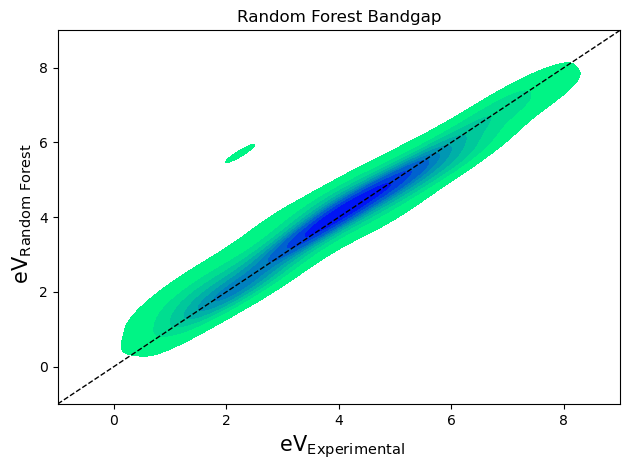

In [55]:
ax = sns.kdeplot(x=Y_test, y=Y_pred, fill=True, cmap='winter_r')
ax.set_ylabel(r' eV$_{\text{Random Forest}}$', fontsize=15)
ax.set_xlabel(r' eV$_{\text{Experimental}}$', fontsize=15)
ax.set_title('Random Forest Bandgap')
ax.set_xlim([-1,9])
ax.set_ylim([-1,9])
ax.plot([-1, 9], [-1, 9], 'k--', linewidth=1)
plt.tight_layout()

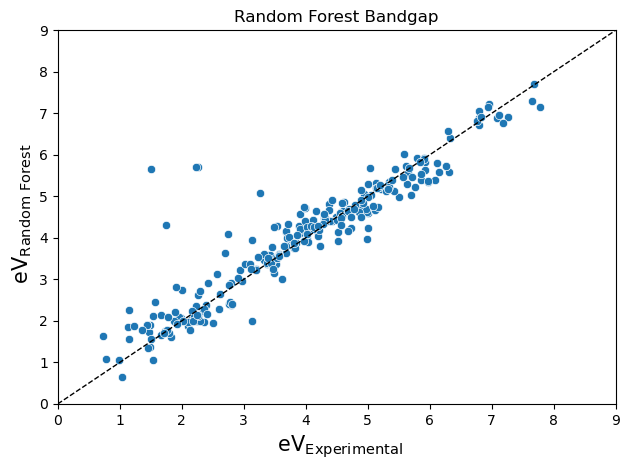

In [56]:
ax = sns.scatterplot(x=Y_test, y=Y_pred)
ax.set_ylabel(r' eV$_{\text{Random Forest}}$', fontsize=15)
ax.set_xlabel(r' eV$_{\text{Experimental}}$', fontsize=15)
ax.set_title('Random Forest Bandgap')
ax.set_xlim([0,9])
ax.set_ylim([0,9])
ax.plot([0, 9], [0, 9], 'k--', linewidth=1)
plt.tight_layout()